# Titanic Data Exploration

# Preliminary Wrangling


In this document we will explore titanic dataset that contains information about 900 passengers

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#overview of data 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Cleaning dataset

This part is to clean the data before starting visualizations.

In [4]:
titanic.shape

(891, 12)

In [5]:
#Drop unnecessary columns
titanic.drop(['PassengerId','Ticket','Cabin','Name'], axis = 1, inplace = True)

In [6]:
#test
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
#fill NAN values with mean
titanic.fillna(titanic.mean(), inplace = True)

In [8]:
#Test
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
#Drop rows that contais NAN value
titanic.dropna(inplace = True)

In [10]:
#test
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
## descriptive statistics for numeric variables
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the structure of your dataset?

The dataset contain 889 rows and 8 columns

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in "survived" feature to find out the number of survivors and the factors that affected or helped their survival.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think  fare and Pclass will have the strongest effect .they will increase the chance of survival because the attention will be on the high class because they are  definitely  paid more than other classes.
Beside that "age" will effect chance of survival cause chidren and old people in example have less chance to survive.

## Univariate Exploration

In this part we will explores univariate data to looking at the distribution of the interesting variables.

In [12]:
#set the default color and method to avoid duplicated code
def x_y_t(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
color = sns.color_palette()[2]


### How many survivors and non-survivors?

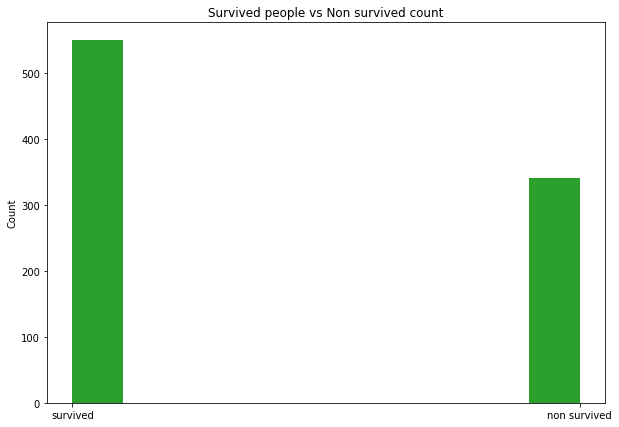

In [13]:
plt.figure(figsize=[10, 7])
plt.hist(data = titanic, x = 'Survived', bins = 10,color=color)
x_y_t('','Count','Survived people vs Non survived count')
plt.xticks([0, 1], ['survived', 'non survived'])
plt.show()


Most of passengers are survived, they were about third of the passengers. 

### Are the Most passengers are men or women?


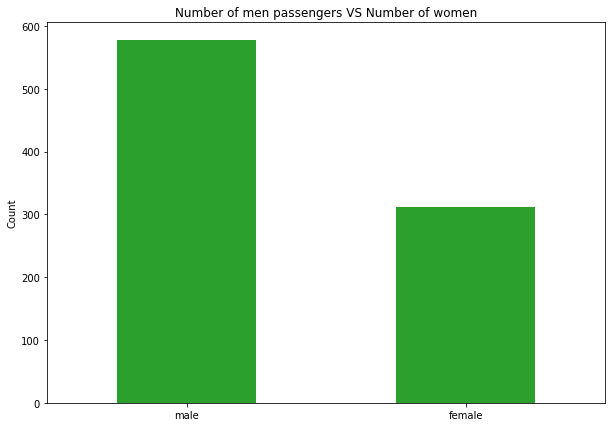

In [14]:
sex = titanic.Sex.value_counts()
plt.figure(figsize=[10, 7])
sex.plot(kind = 'bar',color=color)
plt.xticks(rotation=0)
x_y_t('','Count','Number of men passengers VS Number of women')
plt.show()


Number of men is greater than number of women and maybe that is because women in that time dose not travel a lot, also we must take staff in consider because most of them are men.

### How the distribution of the Fare look like?




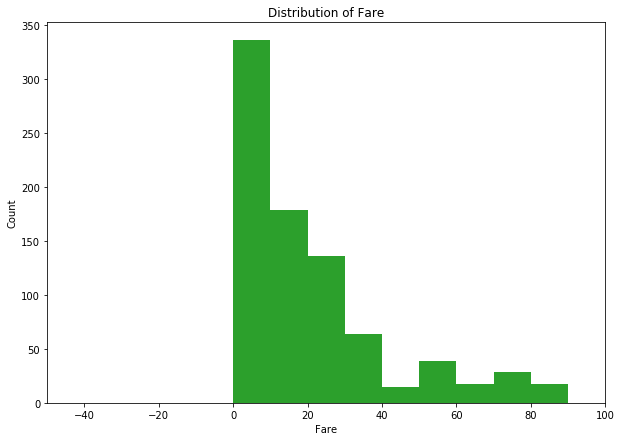

In [15]:
age_dest=titanic[titanic.Fare.notnull()]
plt.figure(figsize=(10,7))
bin_edges=np.arange(-50,100,10)
plt.hist(age_dest.Fare,bins=bin_edges,color=color)
plt.xlim(-50,100)
x_y_t('Fare','Count','Distribution of Fare')


The distribution is right skewed and we can see in histogram above that most of the Fare are concentrated between 0 and 40. .



### Which class have the highest number of passengers?


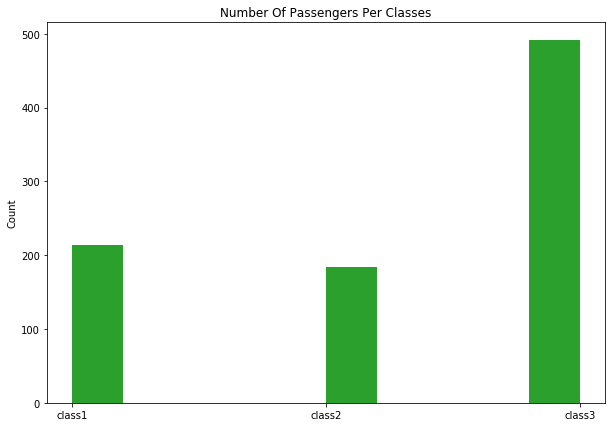

In [16]:
plt.figure(figsize=[10, 7])
plt.hist(data = titanic, x = 'Pclass', bins = 10,color=color)
x_y_t('','Count','Number Of Passengers Per Classes')
plt.xticks([1, 2, 3], ['class1', 'class2','class3'],rotation=0)
plt.show()

Depend on the previous plot, class number 3 has the highest number of passengers and this is not surprised because it is the cheapest class.

### Which Embarkation has the largest number of passengers?



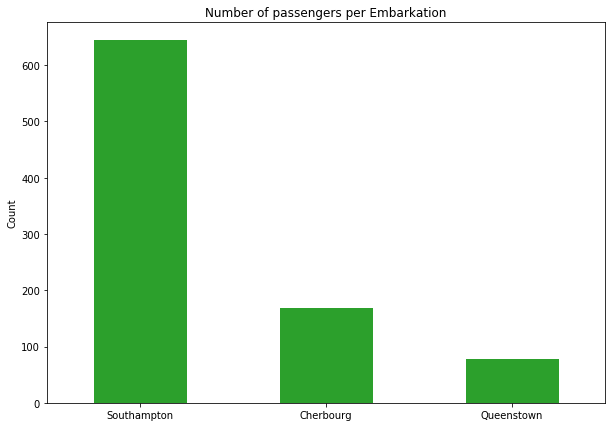

In [17]:
emb = titanic.Embarked.value_counts()
plt.figure(figsize=[10, 7])
emb.plot(kind = 'bar',color=color)
x_y_t('','Count','Number of passengers per Embarkation')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg','Queenstown'],rotation=0)
plt.show()

Most of passengers are from Southampton.

### What is the distribution of the ages of all  passengers?


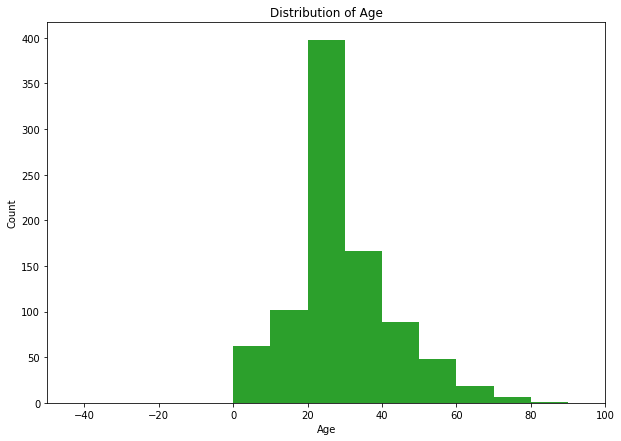

In [18]:
age_dest=titanic[titanic.Age.notnull()]
plt.figure(figsize=(10,7))
bin_edges=np.arange(-50,100,10)
plt.hist(age_dest.Age,bins=bin_edges,color=color)
plt.xlim(-50,100)
x_y_t('Age','Count','Distribution of Age')

In the above histogram we can see the most passengers age distribute between 20 to 40 ages approximately

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the variables have expected distributions. So there are no unusual points and therefore there is no need to perform any additional transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did not change any form in the data.


## Bivariate Exploration

### Are the passengers in class 1 will survive more than outher classes? 


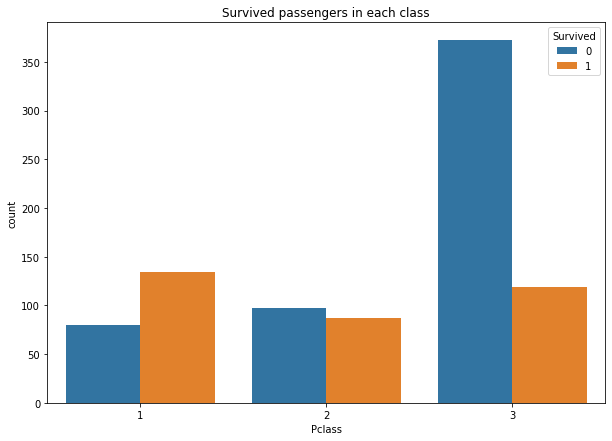

In [19]:
plt.figure(figsize=(10,7))
x_y_t('','','Survived passengers in each class')
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived');

As I expected before the most survivors were from passengers in first class

### Are the most sibling survived?


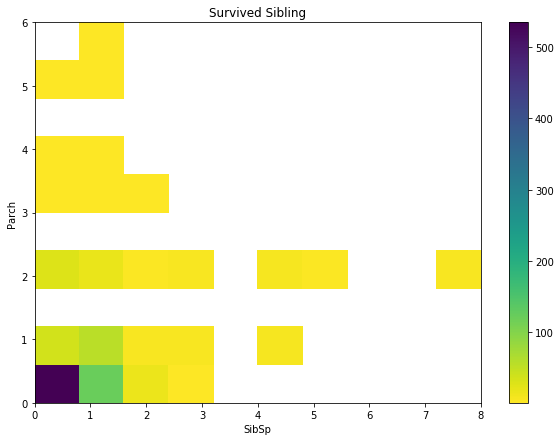

In [20]:
{"tags": ["hide_input",]}
plt.figure(figsize=(10,7))
x_y_t('','','Survived Sibling')
plt.hist2d(data = titanic, x = 'SibSp', y = 'Parch', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('SibSp')
plt.ylabel('Parch');

The most survivor did not have a sibling

### What is the the ages of the passengers in each class?


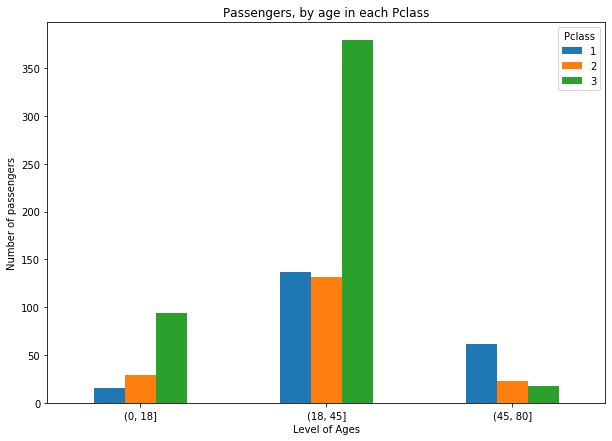

In [21]:
bins = [0, 18, 45,80]
passengers_by_age = titanic.groupby(['Pclass', pd.cut(titanic.Age, bins)])
age_by_pclass = passengers_by_age.size().unstack()

age_by_pclass1 = age_by_pclass.iloc[0]
age_by_pclass2 = age_by_pclass.iloc[1]
age_by_pclass3 = age_by_pclass.iloc[2]
age_by_pclass_t = age_by_pclass.transpose()
ax = age_by_pclass_t.plot(kind='bar',figsize=(10,7),title="Passengers, by age in each Pclass", xticks=[])
ax.set_xlabel("Level of Ages")
ax.set_ylabel("Number of passengers")

plt.show();


### Are the most survivor are children, youth or old?


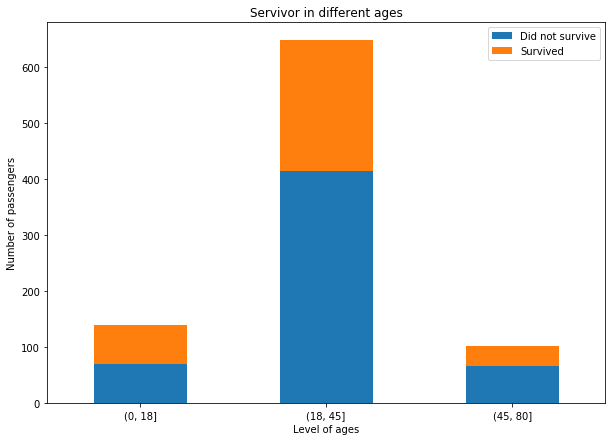

In [22]:
bins = [0, 18, 45, 80]
passengers_by_age = titanic.groupby(['Survived', pd.cut(titanic.Age, bins)])
survived_by_age = passengers_by_age.size().unstack()

survived_by_age_t = survived_by_age.transpose()
ax = survived_by_age_t.plot(kind='bar',figsize=(10,7),stacked=True, title="Servivor in different ages", xticks=[])
ax.set_xlabel("Level of ages")
ax.set_ylabel("Number of passengers")
ax.legend(['Did not survive', 'Survived'])
plt.show()



Number of young survivor is the highest number from other different ages

### Are the most survivor are women or men?

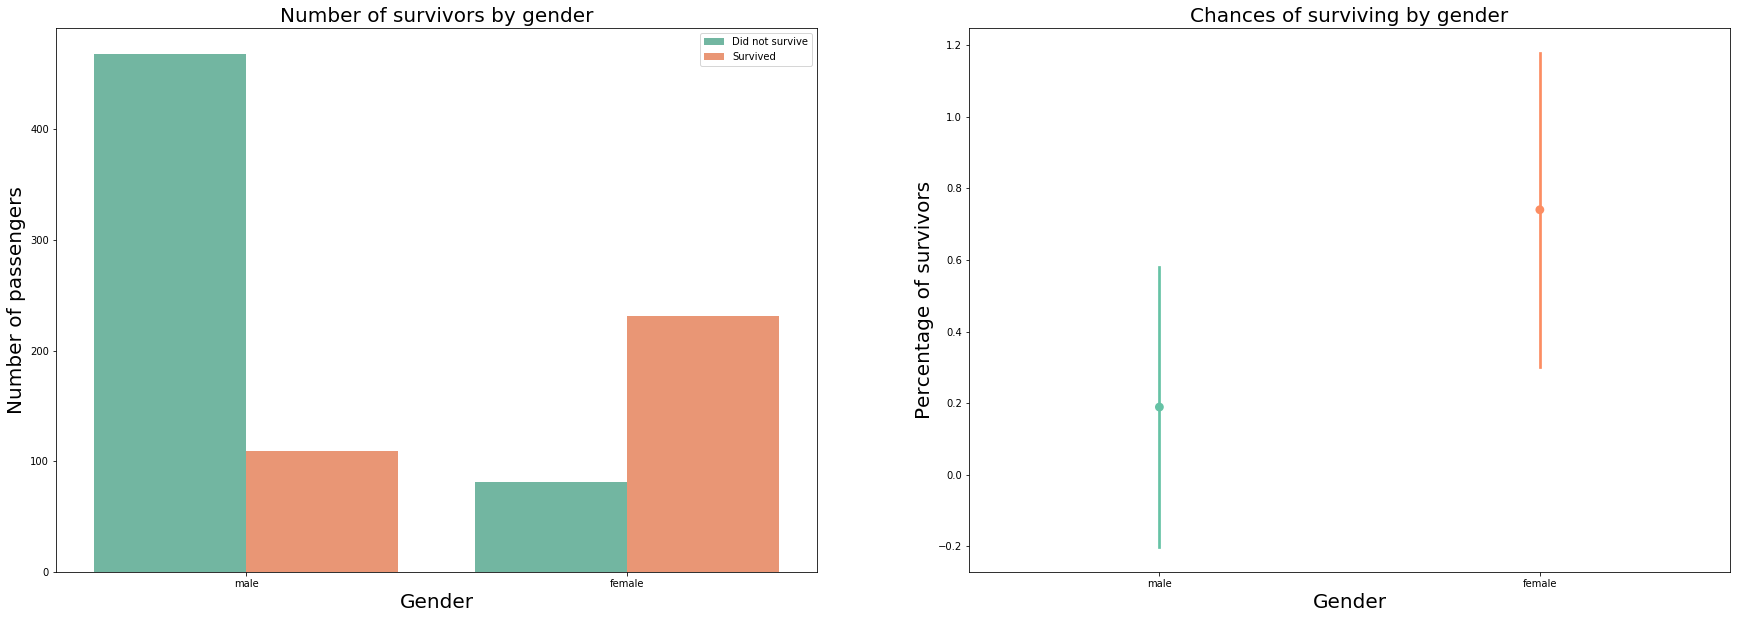

In [23]:
m_survived = titanic[titanic.Sex == "male"]["Survived"]
f_survived = titanic[titanic.Sex == "female"]["Survived"]

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.countplot(x="Sex", hue="Survived", palette="Set2", data=titanic, ax=ax1)
ax1.set_title("Number of survivors by gender",fontsize=20)
ax1.set_xlabel("Gender",fontsize=20)
ax1.set_ylabel("Number of passengers",fontsize=20)
ax1.legend(labels=['Did not survive', 'Survived'])
sns.pointplot(x="Sex", y="Survived", palette="Set2", data=titanic, ax=ax2, ci='sd',fontsize=20)
ax2.set_title("Chances of surviving by gender",fontsize=20)
ax2.set_xlabel("Gender",fontsize=20)
ax2.set_ylabel("Percentage of survivors",fontsize=20)

plt.show()


Women had the highest number of chance to survive so it is unsupraisly that the number of women survivor is greater than men.

## Multivariate Exploration


#### In this part, we will investigate the relationship of the youngs survivor with other features.
### In which class were they?


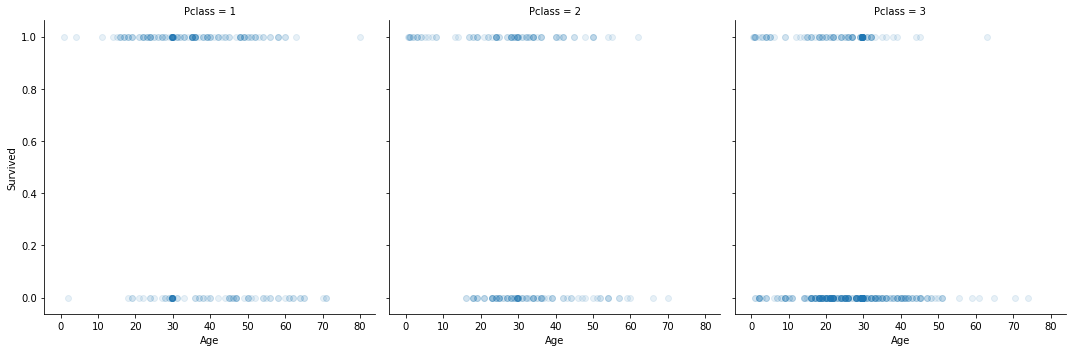

In [24]:
sedan_classes = [1,2, 3]
g = sns.FacetGrid(data = titanic, col = 'Pclass', height = 5, col_wrap = 3)
g.map(plt.scatter, 'Age', 'Survived', alpha = 1/10);

The youngs survivor concentrated in class 3 and they are in range from 20 to 40 approximately

### Were there are sibling between them?

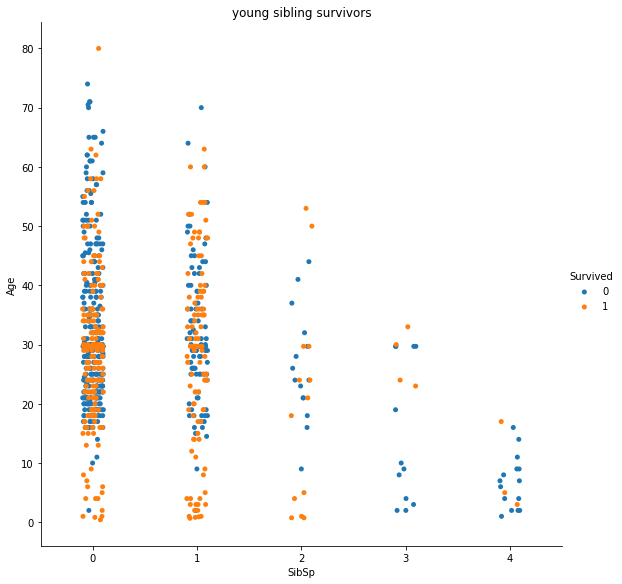

In [25]:
g = sns.FacetGrid(data = titanic, hue = 'Survived', height = 8)
g.map(sns.stripplot, 'SibSp', 'Age',jitter = True, dodge = True, order=None)
g.set(title='young sibling survivors')
g.add_legend();

The most young survivors does not have a siblings.

### Summary
After analyzing the data, we found :
- The most survivors were from passengers in first class,
  and this is normal because they are the focus of attention.
- women had a greater chance of survival than men.
- The most survivor ages were between 20 to 40 year, base on that maybe the age is the main factor 
  that affected the survival chance.